In [1]:
import pandas as pd

In [8]:
data = pd.read_csv("data/GOOGL.csv")
data["Date"] = data.index
data.reset_index(drop=True, inplace=True)

In [10]:
data = data[["Date","Close"]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    253 non-null    int64  
 1   Close   253 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.1 KB


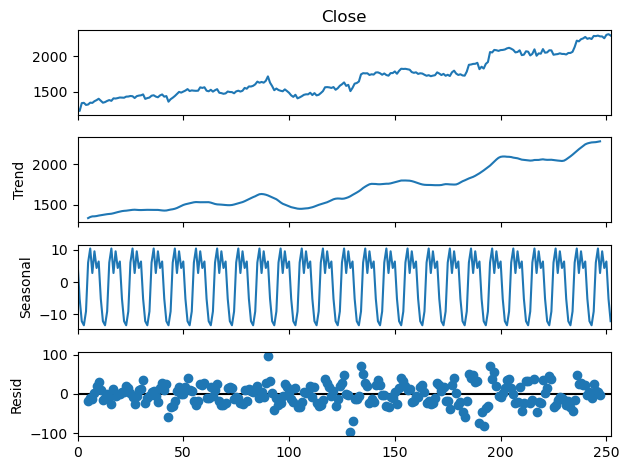

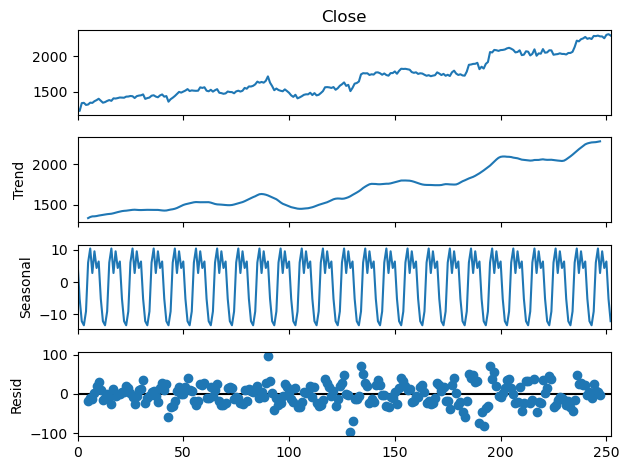

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], period=10)
result.plot()

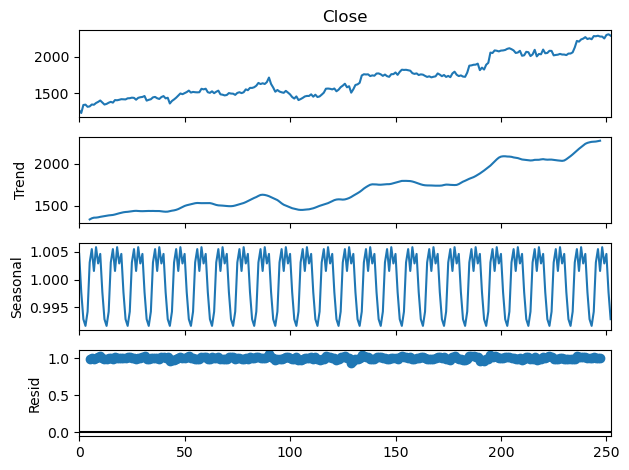

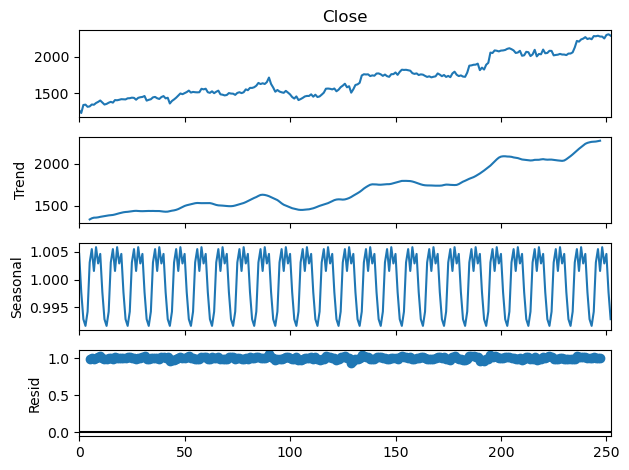

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], model="multiplicative", period=10)
result.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

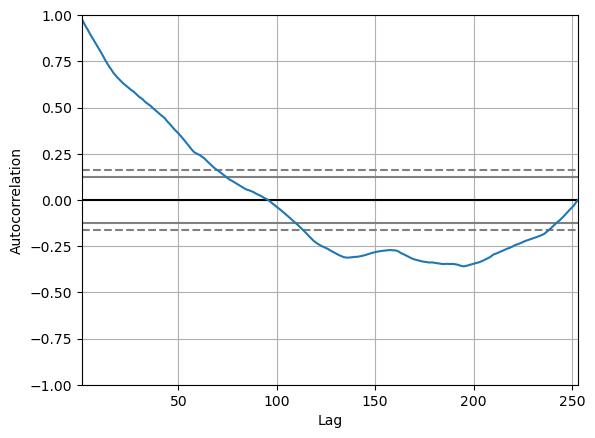

In [16]:
pd.plotting.autocorrelation_plot(data["Close"])
# 여기서 밴드구간안에 들어가는 lag값으로 설정하고 뒤에서 확인하기

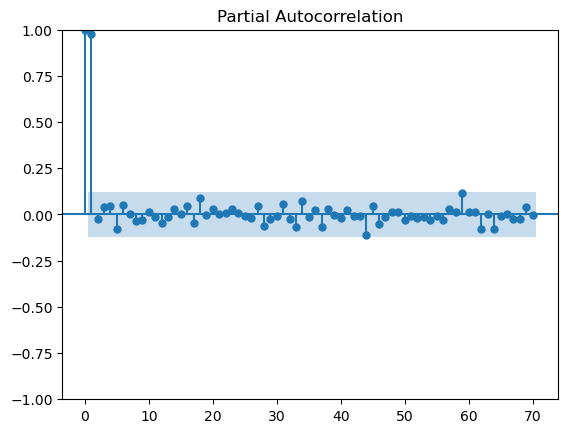

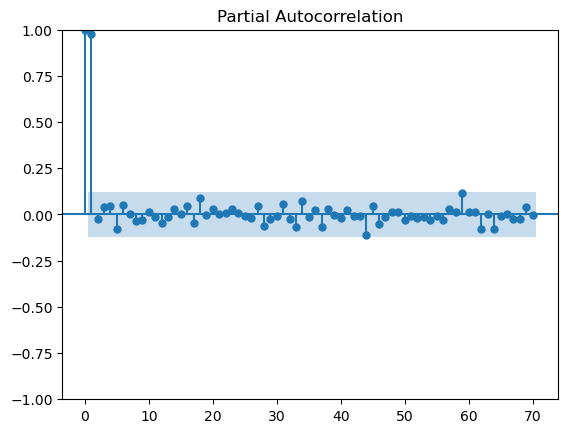

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags=70)

In [20]:
p,d,q = 5,1,2
from statsmodels.tsa.arima.model import ARIMA

In [23]:
model = ARIMA(data["Close"], order=(p,d,q))
fitted = model.fit()
fitted.summary() # 해석어려움

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  253
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -1218.852
Date:                Wed, 07 Aug 2024   AIC                           2453.705
Time:                        14:44:10   BIC                           2481.940
Sample:                             0   HQIC                          2465.066
                                - 253                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1651      0.244      0.676      0.499      -0.314       0.644
ar.L2         -0.4201      0.190     -2.207      0.027      -0.793      -0.047
ar.L3         -0.0704      0.074     -0.957      0.338      -0.215       0.074
ar.L4          0.1248      0.069      1.801      0.072      -0.011       0.261
ar.L5         -0.2186      0.073     -3.010      0.003      -0.361      -0.076
ma.L1         -0.2236      0.248     -0.902      0.367      -0.709       0.262
ma.L2          0.4897      0.201      2.436      0.015       0.096       0.884
sigma2       929.1024     69.050     13.455      0.000     793.767    1064.438
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                31.06
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                             0.11
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
predicts = fitted.predict()
predicts = fitted.predict(len(data), len(data)+10) # 예측을 어디서부터 어디까지 해달라고
predicts

253    2289.338554
254    2295.209371
255    2289.088297
256    2281.176607
257    2285.965150
258    2291.601874
259    2289.031316
260    2286.252375
261    2288.803133
262    2290.229473
263    2288.036409
Name: predicted_mean, dtype: float64

<Axes: >

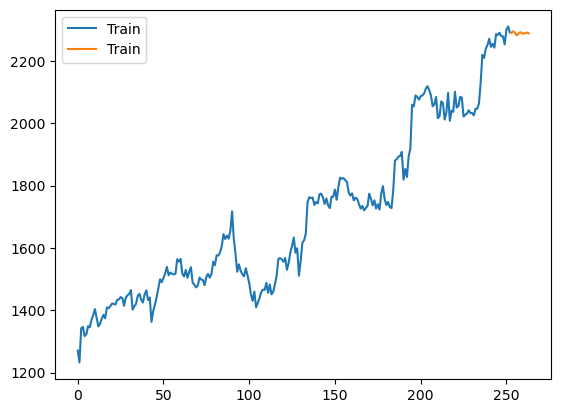

In [25]:
data["Close"].plot(legend=True, label="Train")
predicts.plot(legend=True, label="Train")

C:\Users\user\anaconda3\envs\torch-book\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\envs\torch-book\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\user\anaconda3\envs\torch-book\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

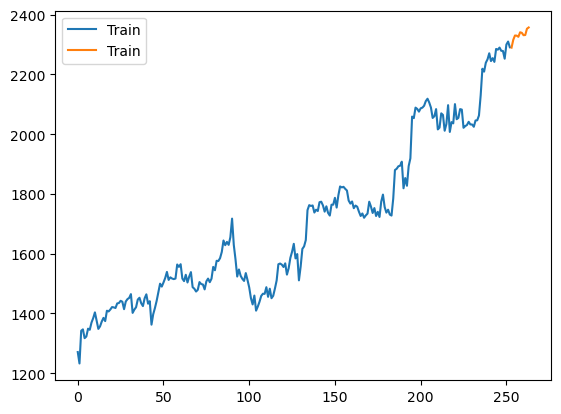

In [28]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(data["Close"], order=(p,d,q), seasonal_order=(p,d,q,12)) # 12: 연단위로 보려고
fitted = model.fit()
predicts = fitted.predict()
predicts = fitted.predict(len(data), len(data)+10)
data["Close"].plot(legend=True, label="Train")
predicts.plot(legend=True, label="Train")
# 이 예측값이 더 정확 (추세를 따라감)